### Analysing churn  with the factors which can cause customers to exit our services.

## Context -

#### A number of customers  have opted out of our services and we have to find out what are the causing factors with the help of the data given to us.

##  The Analysis -

### 1) Importing libraries and understanding the dataset :

In [ ]:
#importing the libraries-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting the drive to google colab so we can get the dataset-

from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/data science"

Mounted at /content/drive/
 Archive				   fedex.csv
'Bank Customer Churn Prediction (1).csv'   IMG_20210302_160336.jpg
 Chilli_Disease.ipynb			   insurance.csv
'Face Recognition.ipynb'


In [ ]:
# the dataset to be used-

churn = pd.read_csv( "/content/drive/My Drive/data science/Bank Customer Churn Prediction (1).csv")

In [ ]:
# the dataset-

churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [ ]:
#shape of dataset-

churn.shape

(10000, 11)

Inference-

The dataset hass 10000 rows and 11 columns.

In [ ]:
# information regarding dataset-

churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Inference-

The dataset has datatype:

2 columns of float type

7 columns integer type

2 columns object type.

The entries-10000

In [ ]:
#describing numerical columns-

churn.describe()

,customer_id,credit_score,age,tenure,balance,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,1.00000,1.000000,199992.480000,1.000000


Inference-

'customer_id', 'credit_score', 'age', 'tenure' 'balance','credit_card', 'active_member', 'estimated_salary','churn' are the numerical columns described above along with their mean,min and max.

In [ ]:
# The name of columns present in the dataset-

churn.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'credit_card', 'active_member', 'estimated_salary', 'churn'],
      dtype='object')

## 2) Cleaning the dataset :

### a) Checking null values if present-

In [ ]:
# null values in dataset-

churn.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Inference-

There are 0 null values present in dataset.

### b) checking for duplicate values-

In [ ]:
# the duplicate values-

churn.duplicated().sum()

0

Inference-

There are 0 duplicate values present in dataset

## 3) Exploratory Data Analysis :

churn is the target variable.The reason is that these variables have a direct or indirect  relationship with the delivery business.

In [ ]:
# the unique values from every column in the dataset-

churn.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [ ]:
# distinct values in country column-

churn.country.value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

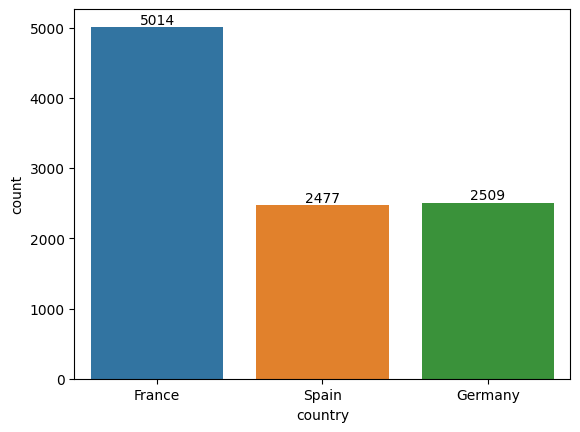

In [ ]:
#plotting the country column to analyse the distribution in it-

ax = sns.countplot(x = 'country',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

inference-

we can observe form the figure that majority of our customers are form france followed by spain and germany.

In [ ]:
# distinct values in gender column-

churn.gender.value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

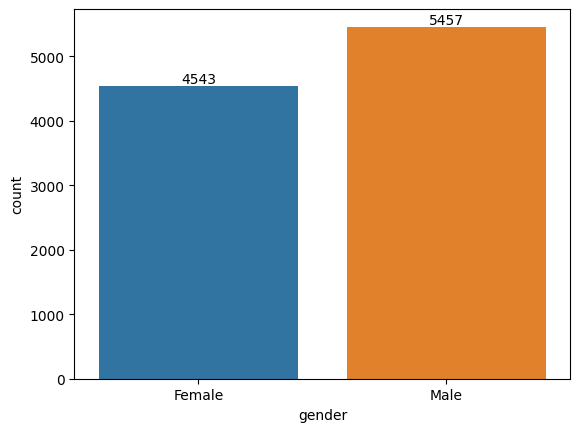

In [ ]:
#plotting the gender column to analyse the distribution in it-

ax = sns.countplot(x = 'gender',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe from the figure that bank has a high number of customers who are male followed by female.

In [ ]:
# distinct values in age column-

churn.age.value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

In [ ]:
# Age column can be binned-

churn['Age'] = pd.cut(churn['age'],bins=[18,30,45,60,75,100],labels= ['18-30Years','30-45Years','45-60Years','60-75Years','75+Years'])

In [ ]:
# the binned distinct values in age column-

churn.Age.value_counts()

30-45Years    5921
18-30Years    1946
45-60Years    1647
60-75Years     419
75+Years        45
Name: Age, dtype: int64

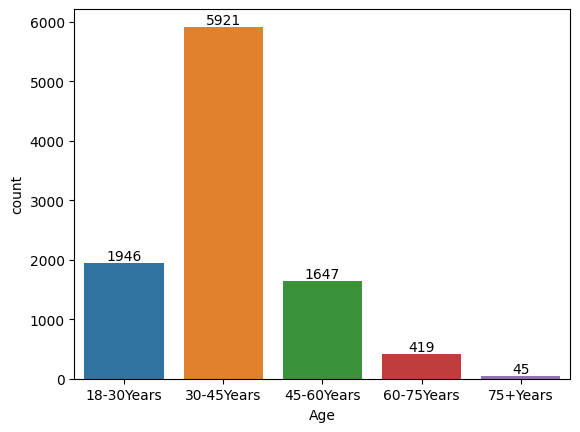

In [ ]:
#plotting the Age column to analyse the distribution in it-

ax = sns.countplot(x = 'Age',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

Customers aged 18 to 30, primarily college students and younger employees, tend to have bank accounts due to their need for financial management during their education and early careers. Meanwhile, customers aged 30 to 45, mostly senior employees or executives, also have bank accounts. This is driven by their stable careers, higher incomes, and the necessity to manage finances, savings, and investments. Additionally, bank accounts offer convenience, security, and access to financial services for individuals in senior positions. However, individual circumstances and preferences can vary within these age groups.

There are several reasons why individuals over the age of 50 may not have bank accounts. Some older individuals may prefer cash transactions and have limited exposure to digital banking. Limited access to banking services, lack of technological skills, and reliance on alternative financial services can also contribute to the lack of bank accounts among this group. Fixed incomes or retirement benefits received through other means and negative banking experiences may further discourage them from opening bank accounts. Cultural and generational factors can also influence their banking habits. However, it's important to remember that these reasons do not apply universally, as individual circumstances and preferences vary.

In [ ]:
# distinct values in tenure columns-

churn.tenure.value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

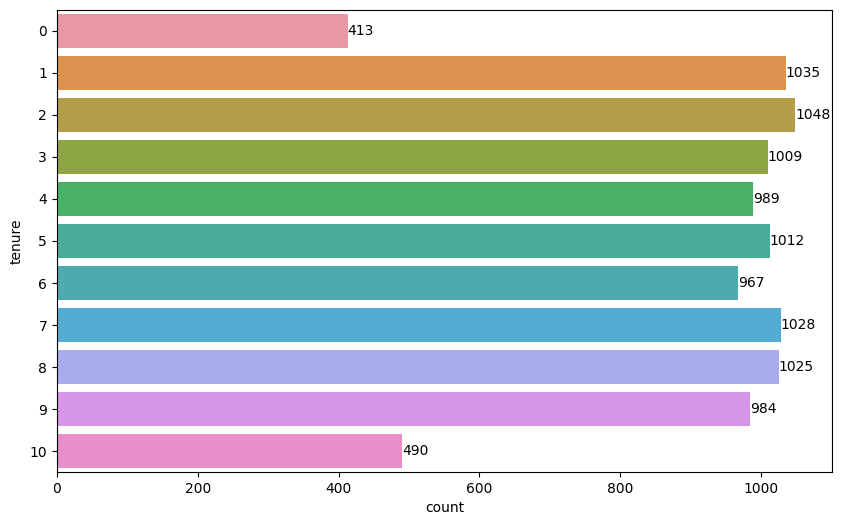

In [ ]:
#plotting the tenure column to analyse the distribution in it-

plt.figure (figsize=(10,6))
ax = sns.countplot(y = 'tenure',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

inference-

The equal distribution of customers among tenure values, excluding 0 and 10, suggests that factors such as customer satisfaction, effective relationship management, competitive offerings, trust, reputation, and effective communication might contribute to customer retention. The bank's consistent delivery of satisfactory services, personalized attention, and competitive products across different tenure periods likely encourages customers to stay with the bank.

In [ ]:
# distinct values in credit card collumn-

churn.credit_card.value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

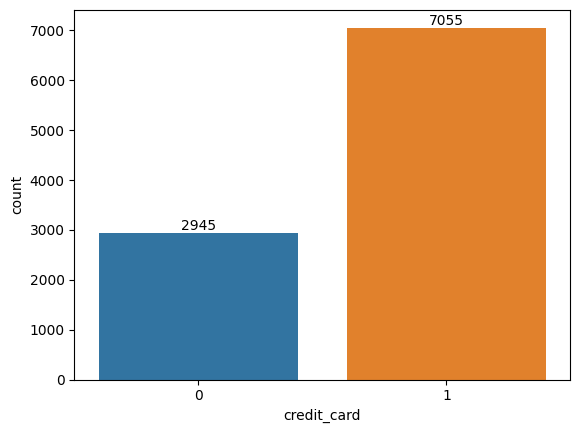

In [ ]:
#plotting the credit card column to analyse the distribution in it-

ax =sns.countplot(x = 'credit_card',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The majority of customers, with less than 3000 out of 10000, do not have credit cards. This can be attributed to several factors, including a preference for debit or cash transactions, limited credit history or eligibility, concerns about financial stability and debt management, availability of alternative payment methods, personal financial goals, and lack of awareness or trust in credit card usage. Individual circumstances, cultural differences, and personal preferences also contribute to this observation.

In [ ]:
# distinct values in active member column-

churn.active_member.value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

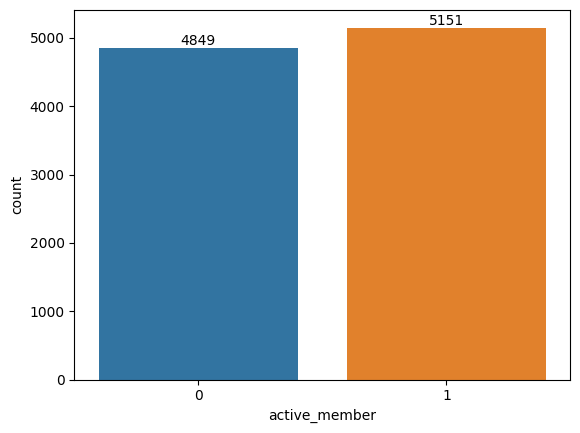

In [ ]:
#plotting the active member column to analyse the distribution in it-

ax = sns.countplot(x = 'active_member',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The figure shows that there is an almost equal number of active and non-active members. This could be due to factors such as customer churn, effective customer acquisition and retention strategies, the presence of different membership types with varying levels of engagement, seasonal or cyclical patterns in membership activity, and variations in service usage behavior. The specific context and industry should be considered to gain a deeper understanding of why this balance exists between active and non-active members.

In [ ]:
# distinct values in churn column-

churn.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

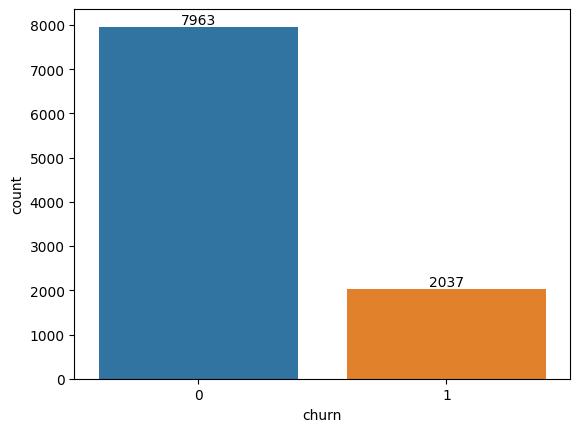

In [ ]:
#plotting the churn column to analyse the distribution in it-

ax = sns.countplot(x = 'churn',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

Inference- 

0 - It indicates customers who haven't churned out.

1 - It indicates customers who have churned out.

In [ ]:
# the dataset-

churn.head()

,customer_id,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn,Age
0,15634602,619,France,Female,42,2,0.00,1,1,101348.88,1,30-45Years
1,15647311,608,Spain,Female,41,1,83807.86,0,1,112542.58,0,30-45Years
2,15619304,502,France,Female,42,8,159660.80,1,0,113931.57,1,30-45Years
3,15701354,699,France,Female,39,1,0.00,0,0,93826.63,0,30-45Years
4,15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,30-45Years


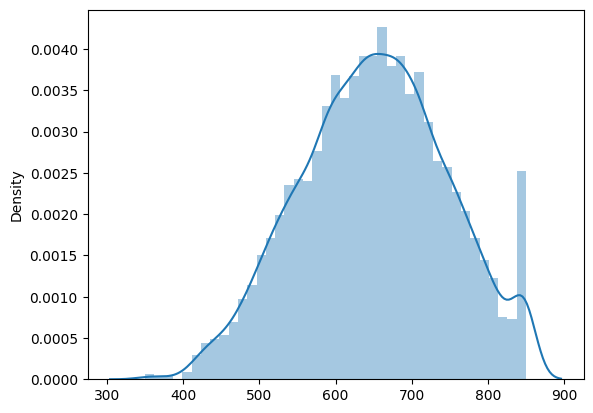

In [ ]:
#plotting the credit score column to analyse the distribution in it-

sns.distplot(x = churn['credit_score'])
plt.show()

Inference-

People seeking higher loan amounts tend to maintain higher credit scores within the range of 600 to 800. This is because a higher credit score signifies greater creditworthiness, which makes borrowers more attractive to lenders and increases their chances of obtaining larger loan amounts. Additionally, borrowers with higher credit scores are often offered lower interest rates, making larger loans more affordable. Maintaining a higher credit score also reflects better financial stability, further reassuring lenders about a borrower's ability to handle larger loan amounts. Meeting specific credit score requirements set by lenders is crucial for accessing desired loan amounts. While credit score is not the sole determinant, it plays a significant role in obtaining larger loans.

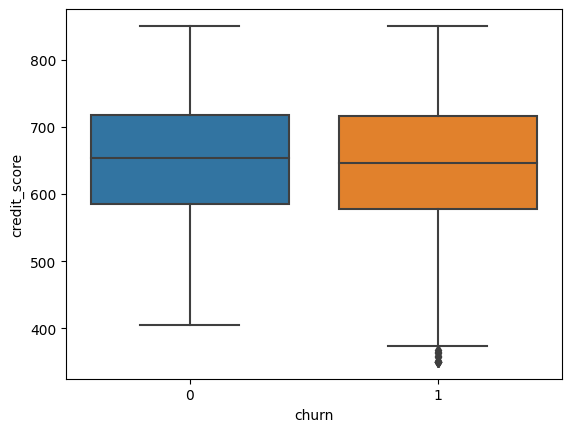

In [ ]:
#plotting the credit score column along churn column to understand how it  affect's customer churning-

sns.boxplot(x = 'churn',y ='credit_score',data =churn)
plt.show()

Inference-

From the figure, it can be observed that a significant number of customers who churned out and customers who haven't churned had a high credit score. Based on this, it can be inferred that credit score alone may not be a determining factor in customer churn.

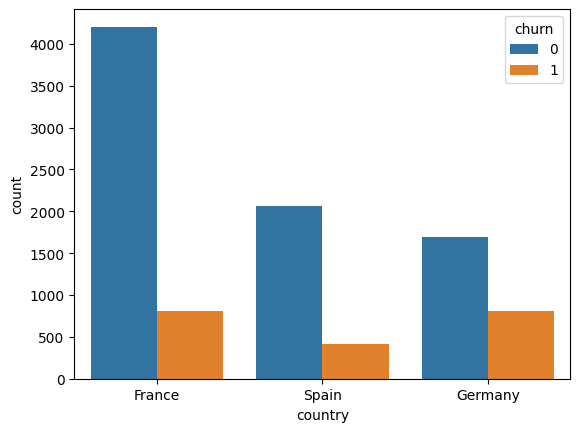

In [ ]:
#plotting the country column along churn column to understand how it  affect's customer churning-

sns.countplot(x = 'country',data=churn,hue='churn')
plt.show()

Inference-

From the figure, it can be observed that a significant number of customers who churned out and customers who haven't churned out were from France and Germany. However, it would be inappropriate to conclude that being from a particular country directly affects customer churn without considering other factors. The observation suggests that customers from these countries are both prone to churning and likely to stay, indicating that country of origin alone may not be a strong determinant of customer churn. To gain a better understanding, additional analysis is required to consider variables such as customer behavior, satisfaction levels, product preferences, and market dynamics. While the country of origin can provide some insights, it should not be considered as the sole or primary factor in determining customer churn.

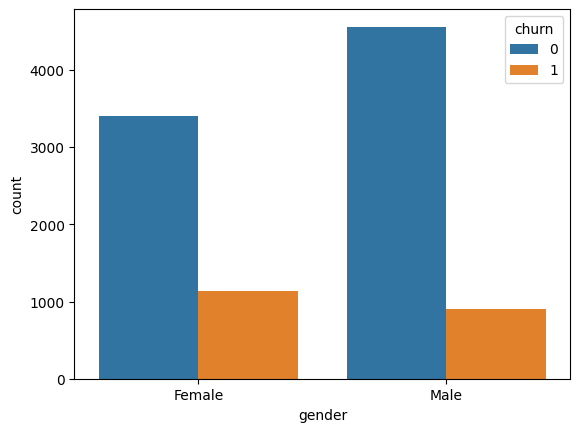

In [ ]:
# #plotting the gender column along churn column to understand how it  affect's customer churning-

sns.countplot(x = 'gender',data=churn,hue='churn')
plt.show()

Inference-

From the figure, it can be observed that the majority of customers who churned were female. This indicates a potential correlation between gender and customer churn. To address this issue, it would be beneficial to focus more on understanding and catering to the needs of female customers in order to reduce churn. By conducting research and gathering feedback specifically from female customers, the company can gain insights into their preferences, pain points, and reasons for churning. This information can help identify areas for improvement and develop targeted strategies to enhance the customer experience for female customers. It's important to note that while gender may be a significant factor in this particular observation, it's essential to consider other variables and individual circumstances that could contribute to customer churn.

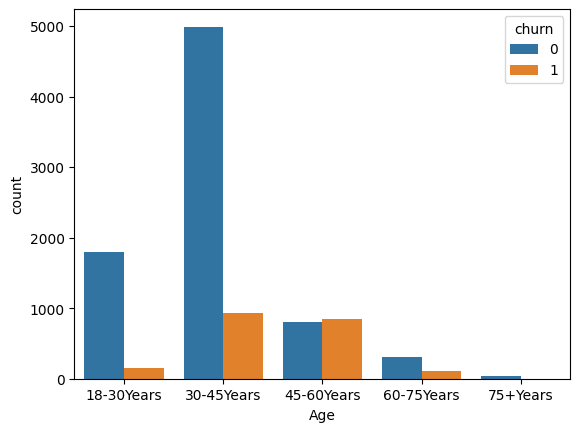

In [ ]:
#plotting the age column along churn column to understand how it  affect's customer churning-

sns.countplot(x = 'Age',data=churn,hue='churn')
plt.show()

Inference-

Customers in the age groups of 30 to 45 years and 45 to 60 years were observed to have higher churn rates. However, the churn rate among customers aged 30 to 45 years is relatively low compared to those who haven't churned. In contrast, the churn ratio in the 45 to 60 age group is similar to the non-churned customers. The lower churn rate in the 30 to 45 age group could be attributed to their financial stability and established relationships with the bank. In the 45 to 60 age group, factors such as retirement and shifting financial priorities may influence the churn ratio. Further analysis and customer feedback are necessary to gain a deeper understanding of the reasons behind churn in these age groups.

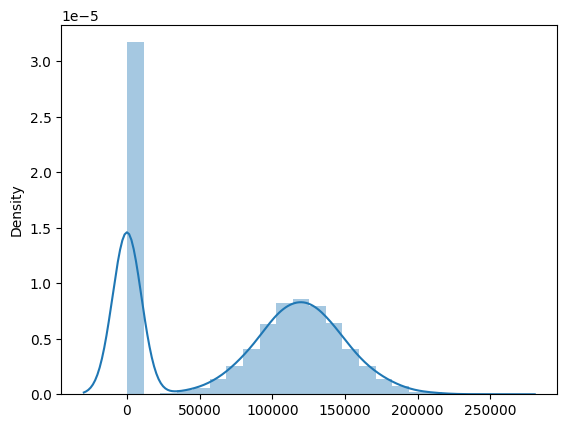

In [ ]:
#plotting the balance column to analyse the distribution in it-

sns.distplot(x = churn['balance'])
plt.show()

In [ ]:
# balance column can be binned-

churn['Balance'] = pd.cut(churn['balance'],bins=[0,50000,100000,150000,200000,260000],labels=['0-50000','50000-100000','100000-150000','150000-200000','200000-260000'])

In [ ]:
# binned balance column-

churn.Balance.value_counts()

100000-150000    3830
50000-100000     1509
150000-200000     935
0-50000            75
200000-260000      34
Name: Balance, dtype: int64

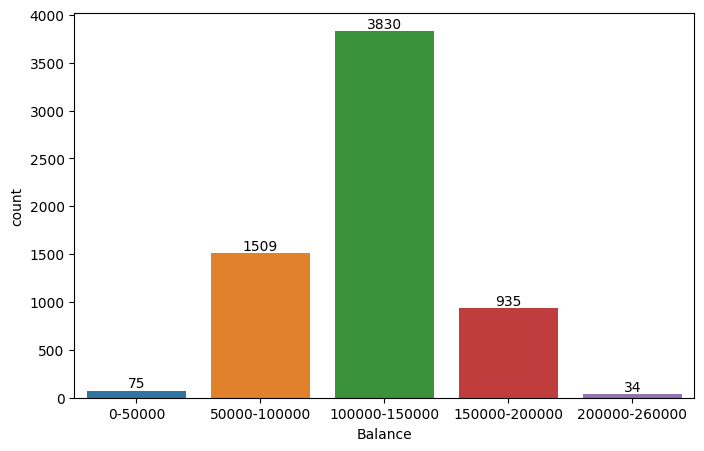

In [ ]:
#plotting the balance column to analyse the distribution in it-

plt.figure (figsize=(8,5))

ax = sns.countplot(x = 'Balance',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

The majority of people have balance amounts ranging from 0 to 1,50,000. This can be attributed to factors such as the distribution of wealth, salary and expense management, savings and investment habits, financial stability, and individual banking behavior. The range reflects the income levels and financial practices of the population, with many individuals maintaining balances within this range for daily expenses, savings, and emergencies. Further analysis considering specific demographics would provide more precise insights into the reasons behind this balance distribution.

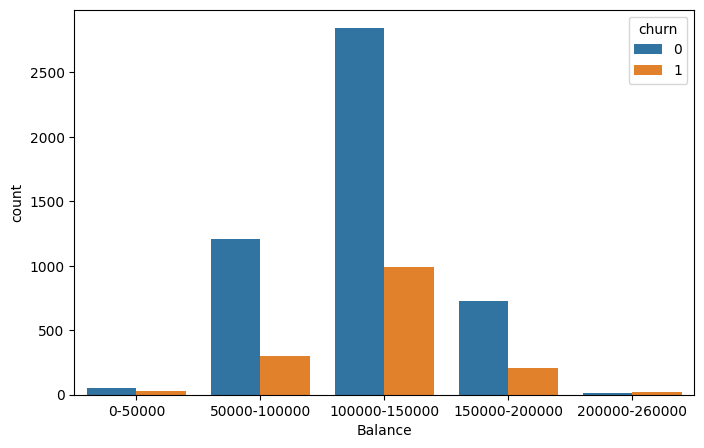

In [ ]:
#plotting the balance column along churn column to understand how it  affect's customer churning-

plt.figure (figsize=(8,5))
sns.countplot(x = 'Balance',data=churn,hue='churn')
plt.show()

Inference-

Customers with lower balances are more likely to churn out of the bank, while those with higher balances tend to remain as customers. This is primarily due to the financial stability and perceived value associated with higher balances. Customers with higher balances often have a greater sense of security, benefits from incentives and rewards, and enjoy personalized services. Additionally, their larger financial commitment and stronger relationship with the bank contribute to their lower likelihood of churning. It's essential to consider other factors such as customer satisfaction and service quality for a more comprehensive understanding of customer churn.

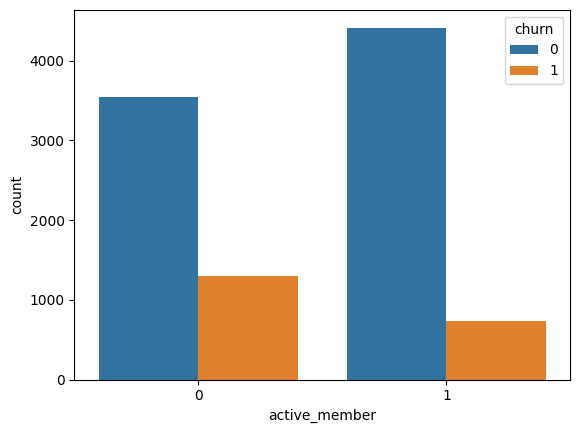

In [ ]:
#plotting the active member column along churn column to understand how it  affect's customer churning-

sns.countplot(x = 'active_member',data=churn,hue='churn')
plt.show()

Inference-

Customers who were inactive have a higher churn rate, indicating several reasons for this pattern. Inactivity often stems from a lack of engagement and perceived irrelevance of the bank's services to customers' current needs. Unsatisfactory experiences, competitive offers from other banks, and significant life changes can also contribute to higher churn rates among inactive customers. To address this, the bank should focus on re-engagement strategies, improving the customer experience, offering targeted promotions, and understanding customers' evolving needs. By addressing these factors, the bank can effectively reduce churn among inactive customers.

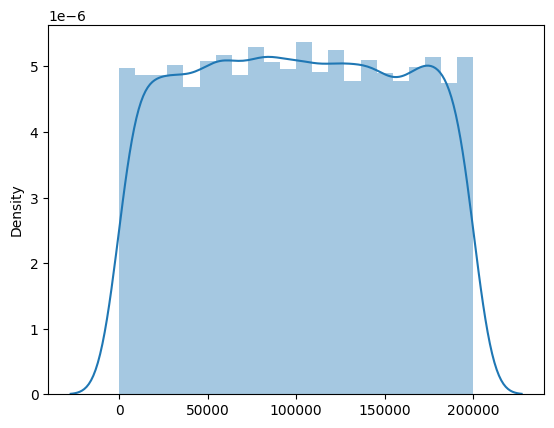

In [ ]:
#plotting the estimated salary column to analyse the distribution in it-

sns.distplot(x = churn['estimated_salary'])
plt.show()

Inference-

from the figure we can observe that customers have a salary of range 0 to 2 lakhs rupees.

here 0 refers to as unemployed.

In [ ]:
# salary column can be binned-

churn['salary']= pd.cut(churn['estimated_salary'],bins=[0,50000,100000,150000,200000],labels=['0-50000','50000-100000','100000-150000','150000-200000'])

In [ ]:
# binned salary column-

churn.salary.value_counts()

100000-150000    2555
50000-100000     2537
150000-200000    2455
0-50000          2453
Name: salary, dtype: int64

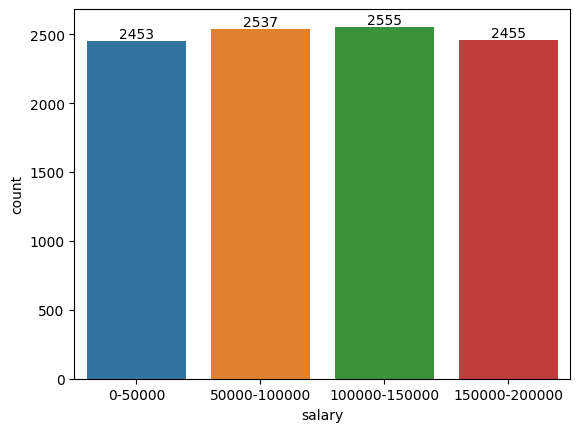

In [ ]:
#plotting the salary column to analyse the distribution in it-

ax = sns.countplot(x = 'salary',data=churn)
ax.bar_label(ax.containers[0])
plt.show()

Inference-

we can observe that every salary group has an almost equal number of customers.

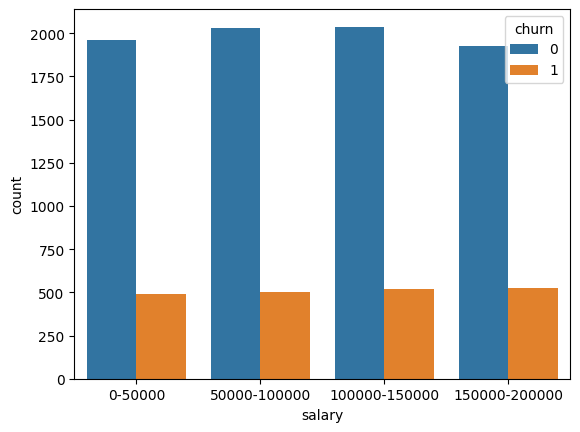

In [ ]:
#plotting the salary column along churn column to understand how it  affect's customer churning-

sns.countplot(x = 'salary',data=churn,hue='churn')
plt.show()

Inference-

The equal distribution of customers across different salary groups suggests that salary alone may not be a determining factor in customer churn. Other factors, such as financial stability, individual circumstances, and non-salary-related aspects like customer satisfaction and competition, may have a more significant impact on churn. Therefore, while salary may play a role, it is not the sole indicator of customer churn. A comprehensive analysis considering multiple factors would provide a more accurate understanding of the relationship between salary and churn.

In [ ]:
# creating dummies columns for multiple categories-

churn = pd.get_dummies(churn,columns=['Age'])

In [ ]:
# creating dummies columns for multiple categories-

churn = pd.get_dummies(churn,columns=['Balance'])

In [ ]:
# declaring a new variable named Churn-

Churn = churn[[ 'gender','credit_card', 'active_member', 'Age_18-30Years', 'Age_30-45Years','Age_45-60Years', 'Age_60-75Years', 'Age_75+Years','Balance_0-50000','Balance_50000-100000', 'Balance_100000-150000','Balance_150000-200000', 'Balance_200000-260000','churn']]

In [ ]:
# the target column-

y = Churn.churn
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

In [ ]:
# encoding the data of certain columns-

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

Churn['gender'] = enc.fit_transform(Churn['gender'])

In [ ]:
# the columns which have direct or indirect realtion with the target column-

x = Churn.iloc[:,:-1]
x.drop('credit_card',inplace=True,axis=1)
x

,gender,active_member,Age_18-30Years,Age_30-45Years,Age_45-60Years,Age_60-75Years,Age_75+Years,Balance_0-50000,Balance_50000-100000,Balance_100000-150000,Balance_150000-200000,Balance_200000-260000
0,0,1,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,0,0,0,0,0,0,0
9996,1,1,0,1,0,0,0,0,1,0,0,0
9997,0,1,0,1,0,0,0,0,0,0,0,0
9998,1,0,0,1,0,0,0,0,1,0,0,0


In [ ]:
# train test split-

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# importing the machine learning algorithms-

from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier()

from sklearn.tree import DecisionTreeClassifier
model_3 = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier()

from sklearn.svm import SVC
model_5 = SVC()

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

# Logistic Regression

In [ ]:
model_1.fit(x_train,y_train) 

predict_1 = model_1.predict(x_test)

accuracy_score(y_test,predict_1)*100

ml = accuracy_score(y_test,predict_1)*100

print('Logistic Regression model accuracy  :' , ml)

Logistic Regression model accuracy  : 82.69999999999999


In [ ]:
ps = precision_score(y_test,predict_1)*100

print('precision score of model : ',ps)

precision score of model :  63.42857142857142


In [ ]:
confusion_matrix(y_test,predict_1)

array([[1543,   64],
       [ 282,  111]])

# KNeighbors Classifier

In [ ]:
model_2.fit(x_train,y_train)

predict_2 = model_2.predict(x_test)

accuracy_score(y_test,predict_2)*100

ml_2 = accuracy_score(y_test,predict_2)*100

print('KNeighbors Classifier model accuracy  :' , ml_2)

KNeighbors Classifier model accuracy  : 81.45


In [ ]:
ps_1 = precision_score(y_test,predict_2)*100

print('precision score of model : ',ps_1)

precision score of model :  54.19847328244275


In [ ]:
confusion_matrix(y_test,predict_2)

array([[1487,  120],
       [ 251,  142]])

# Decision Tree Classifier

In [ ]:
model_3.fit(x_train,y_train)

predict_3 = model_3.predict(x_test)

accuracy_score(y_test,predict_3)*100

ml_3 = accuracy_score(y_test,predict_3)*100

print('DecisionTree Classifier model accuracy :' , ml_3)

DecisionTree Classifier model accuracy : 83.2


In [ ]:
ps_2 = precision_score(y_test,predict_3)*100

print('precision score of model : ',ps_2)

precision score of model :  67.70186335403726


In [ ]:
confusion_matrix(y_test,predict_3)

array([[1555,   52],
       [ 284,  109]])

# Random Forest Classifier

In [ ]:
model_4.fit(x_train,y_train)

predict_4 = model_4.predict(x_test)

accuracy_score(y_test,predict_4)*100

ml_4 = accuracy_score(y_test,predict_4)*100

print('RandomForest Classifier model accuracy  :' , ml_4)

RandomForest Classifier model accuracy  : 83.2


In [ ]:
ps_3 = precision_score(y_test,predict_4)*100

print('precision score of model : ',ps_3)

precision score of model :  67.70186335403726


In [ ]:
confusion_matrix(y_test,predict_4)

array([[1555,   52],
       [ 284,  109]])

# Support Vector Classifier

In [ ]:
model_5.fit(x_train,y_train)

predict_5 = model_5.predict(x_test)

accuracy_score(y_test,predict_5)*100

ml_5 = accuracy_score(y_test,predict_5)*100

print('Support Vector Classifier model accuracy  :' , ml_4)

Support Vector Classifier model accuracy  : 83.2


In [ ]:
ps_4 = precision_score(y_test,predict_5)*100

print('precision score of model : ',ps_4)

precision score of model :  68.82352941176471


In [ ]:
confusion_matrix(y_test,predict_5)

array([[1554,   53],
       [ 276,  117]])

In [ ]:
# basic deep learning model-

import tensorflow as tf
from keras.models  import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(10, input_dim=12, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(x,y,epochs=100,batch_size=10)

Epoch 1/100
1000/1000 [==============================] - 3s 2ms/step - loss: 0.5252 - accuracy: 0.8011
Epoch 2/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4257 - accuracy: 0.8292
Epoch 3/100
1000/1000 [==============================] - 4s 4ms/step - loss: 0.4213 - accuracy: 0.8296
Epoch 4/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4211 - accuracy: 0.8286
Epoch 5/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4201 - accuracy: 0.8294
Epoch 6/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4193 - accuracy: 0.8293
Epoch 7/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4191 - accuracy: 0.8310
Epoch 8/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4183 - accuracy: 0.8308
Epoch 9/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.4178 - accuracy: 0.8293
Epoch 10/100
1000/1000 [==============================] - 3s 3ms/step - l

In [ ]:
predict_dl = model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
loss_and_metrics = model.evaluate (x_test, y_test, verbose=2)

63/63 - 0s - loss: 0.4040 - accuracy: 0.8360 - 228ms/epoch - 4ms/step


a precision score closer to 1.0 generally indicates better performance of a classification model, as it means the model is making fewer false positive predictions.

The model that is closer to 1.0 is support vector classifier with an accuracy of 83.2 and having highest precision score among the models. 

so support vector machine is the best fit model.